In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.linalg import lstsq

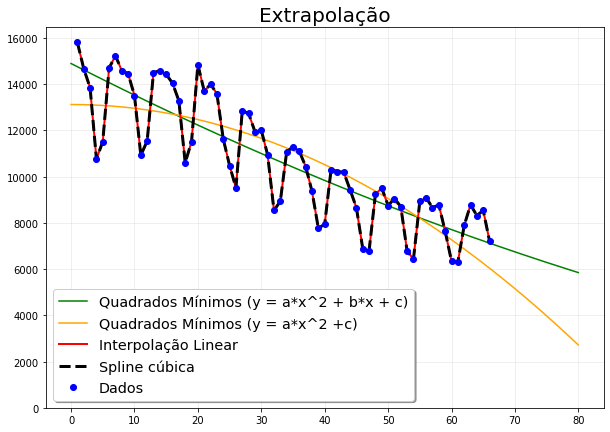

Interpolação linear: -11420.0
Spline cúbica: -2165396.911330141
Quadrados Mínimos (y = a*x^2 + c): 2717.355457661106
Quadrados Mínimos (y = a*x^2 + b*x + c): 5851.7730210129375


In [43]:
#------------------------------------------------------------------------------#

#1. O vetor abaixo contém os últimos 66 valores para as mortes diárias em todo o
#mundo nos últimos 66 dias (retirados de
#https://www.worldometers.info/coronavirus/, do gráfico “Deaths per Day”).
#Faça uma previsão do número de mortes diárias no 80º dia. Justifique sua
#escolha da função a ser ajustada. Critique avaliativamente seu resultado:
#porque você tende a acreditar nele?

#------------------------------------------------------------------------------#
### DADOS ###

x = np.linspace(1, 66, 66)  
y = np.array([15812,14673,13855,10766,11519,14705,15233,14594,14453,13513,10927,
              11543, 14505,14587,14435,14047,13289,10606,11515,14846,13705,14000,
              13595,11635,10484,9519,12844,12740,11950,12013,10946,8544,8934,
              11071,11301,11101,10439,9366,7765,7948,10297,10223,10197,9438,8659,
              6888,6798,9243,9508,8753,9057,8707,6780,6439,8931,9094,8655,8782,
              7635,6345,6307,7892,8784,8318,8545,7214])           
#------------------------------------------------------------------------------#
### AJUSTES DE CURVA ###
#interpolação polinomial
f_interp = interp1d(x, y, fill_value='extrapolate')
y_interp = f_interp(x)

#spline cúbica
f_cub = interp1d(x, y, kind='cubic', fill_value='extrapolate')
y_cub = f_cub(x)

# método dos quadrados mínimos para y = a*x^2 +c
M = x[:, np.newaxis]**[0, 2]
p, res, rnk, s = lstsq(M, y)
xx = np.linspace(0, 80, 1000)
yy = p[0] + p[1]*xx**2

# método dos quadrados mínimos para y = a*x^2 + b*x + c
def func(x, a, b, c):
    return a*x**2 + b*x + c
popt, pcov = curve_fit(func, x, y)
#obs: aqui foi utilizado o método scipy.optimize,
#anteriormente utilizamos o scipy.linalg

#------------------------------------------------------------------------------#
### PLOT DOS GRÁFICOS ###

plt.figure(figsize=(10,7))
plt.plot(xx, func(xx, *popt), label='Quadrados Mínimos (y = a*x^2 + b*x + c)', color='green')
plt.plot(xx, yy, label='Quadrados Mínimos (y = a*x^2 +c)', color='orange')
plt.plot(x, y_interp, color='red', label='Interpolação Linear', linewidth=2)
plt.plot(x, y_cub, color='black', label='Spline cúbica',linestyle='dashed', linewidth=3)
plt.plot(x, y, 'o', label='Dados', color='blue')
plt.legend(loc='lower left',fontsize='x-large',framealpha=1, shadow=True)
plt.ylim(bottom=0)
plt.title('Extrapolação', fontsize=20)
plt.grid(alpha=0.25) 
plt.savefig('extrap.png') 
plt.show()

#------------------------------------------------------------------------------#
### EXTRAPOLAÇÃO ###

#valor para o qual queremos extrapolar
xw = 80 

yw = f_interp(xw) #interpolação linear
yc = f_cub(xw) #spline cúbica
yq = p[0] + p[1]*xw**2 #quadrados mínimos #1
yx = popt[0]*xw**2 +popt[1]*xw + popt[2] #quadrados mínimos #2

print("Interpolação linear: "+str(yw)+
      "\nSpline cúbica: "+ str(yc)+
      "\nQuadrados Mínimos (y = a*x^2 + c): "+ str(yq)+
      "\nQuadrados Mínimos (y = a*x^2 + b*x + c): "+ str(yx)
      )

#------------------------------------------------------------------------------#

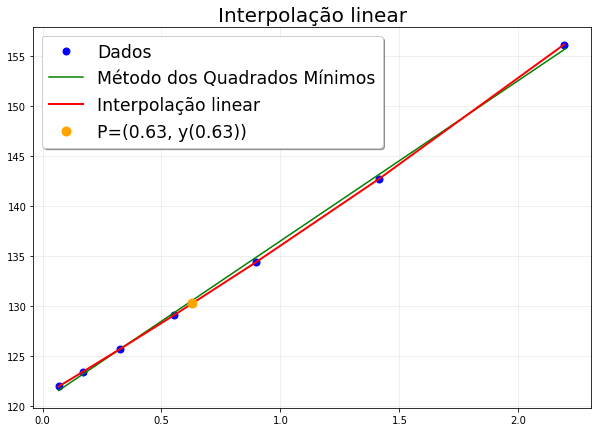

Valor de y(0.63): 130.28594191069877
Erro: 0.0006393744814572951


In [39]:
#------------------------------------------------------------------------------#

# 7.Para calcular y(0.63), use a tabela com valores de x e de y dada abaixo, 
# fornecendo uma estimativa de erro, justificando suas decisões.

#------------------------------------------------------------------------------#
### DADOS ###

x = np.array([0.06813, 0.17032, 0.32361, 0.55355, 0.89845, 1.41581,2.19184]) 
y = np.array([121.9718, 123.4432, 125.6814, 129.1098, 134.4159, 142.7555, 156.1629])           

#------------------------------------------------------------------------------#
### INTERPOLAÇÃO ###

#cria a função de interpolação linear (1D)
f_interp = interp1d(x, y)

xw = 0.63         # x para o qual desejamos descobrir o y
yw = f_interp(xw) # y que queremos descobrir pela interpolação

#------------------------------------------------------------------------------#
### MÉTODO DOS QUADRADOS MÍNIMOS ###

#matriz M=[1:x]
M = x[:, np.newaxis]**[0, 1]

#método dos quadrados mínimos 
#(o vetor p dá os coeficientes da reta)
p, res, rnk, s = lstsq(M, y)

#traçando a reta com os coeficientes calculados
xx = np.linspace(0.068, 2.2, 300)
yy = p[0] + p[1]*xx

#------------------------------------------------------------------------------#
### PLOT DOS GRÁFICOS ###

plt.figure(figsize=(10,7))
plt.plot(x, y, 'o', label='Dados', color='blue',markersize=7)
plt.plot(xx, yy, label='Método dos Quadrados Mínimos', color='green')
plt.plot(x, f_interp(x) , color='red', label='Interpolação linear',linewidth=2)
plt.plot(xw, yw, "o", markersize=9, color='orange', label="P=(0.63, y(0.63))")
plt.legend(loc='upper left',fontsize='xx-large',framealpha=1, shadow=True)
plt.title('Interpolação linear', fontsize=20)
plt.grid(alpha=0.25) 
plt.savefig('interp_lin.png') 
plt.show()

#------------------------------------------------------------------------------#
### CÁLCULO DO ERRO DA INTERPOLAÇÃO EM RELAÇÃO À RETA ENCONTRADA ###

e=0
norm=0
for i in range(0,7):
  e += abs(f_interp(x[i])-yy[i])
  norm += f_interp(x[i])**2
erro=e/norm

#------------------------------------------------------------------------------#
print("Valor de y(0.63): "+str(yw)) #valor de y que queremos interpolar
print("Erro: "+str(erro)) #valor do erro
#------------------------------------------------------------------------------#